# HW2
Author: Zhao Jin

## 1 Feedforward: Building a ReLU Neural Network

### 1.1 
Draw a network with:

• 2 inputs

• 1 hidden layers with 3 hidden units and a 

• 1-class output (for binary classification)

![ezgif.com-crop.png](https://i.loli.net/2019/10/18/kxDdVMG5wyhg3mi.png)

### 1.2 
Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

$$ Output = ReLU(v_1*h_1+v_2*h_2+v_3*h_3+b_i) $$

$$ h_i = ReLU(w_{1i}*x_1+w_{2i}*x_2+b) $$

Note:

$x_i$ stands for the $i^{th}$ input

$h_i$ stands for the output for the $i^{th}$ unit of hidden layer

$w_{ij}$ stands for the weight from $x_i$ to $h_j$

$v_i$ stands for the weight from $h_i$ to the output unit

$b_i$ stands for the bias for the $i^{th}$ unit in hidden layer

$b$ stands for the bias for the output

### 1.3 
Write out the forward-pass function in python, call it ff nn ReLu(...)

In [174]:
import numpy as np
import math
def ReLU(x):
    return np.maximum(0,x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ff_nn__ReLu(x,w,v,b_1,b):
    
    a = np.dot(x,w) + b_1
    h = ReLU(a)
    y = np.dot(h,v) + b
    output = sigmoid(y)

    return np.array(output)

### 1.4 
get the class probabilities associated with the forward pass of each sample given

In [175]:
x = np.array([1,-1,0,-1,0,1]).reshape(3,2)
w = np.array([1,-1,0,0,0,0.5]).reshape(2,3)
v = np.array([1,0,-1]).reshape(3,1)
b_1 = np.array([0,0,1]).reshape(1,3)
b = np.array([1])
result = ff_nn__ReLu(x,w,v,b_1,b)
result

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

## 2 Gradient Descent
Consider a simple non-convex function of two variables:
$$ f(x,y)=(1−x^3)+100∗(y^2 −x)^2 $$

### 2.1 
What are the partial derivatives of f with respect to x and to y?

 $\frac{\partial f}{\partial x} = -3x^3+100*2(y^2-x)*(-1) = -3x^2-200(y^2-x)$

 $\frac{\partial f}{\partial y} = 100*2(y^2-x)*2*y=400y(y^2-x)$

### 2.2 
Create a visualization of the contours of the Rosenbrock function.
$$ (1-x)^2+100(y-x^2)^2 $$

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

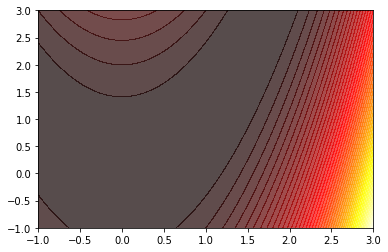

In [177]:
def F(x,y):
    return np.square(1-x)+100*np.square(y-x*x)

n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,F(X,Y),50,alpha=0.7,cmap = plt.cm.hot)

([], <a list of 0 Text yticklabel objects>)

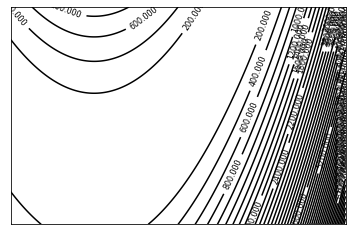

In [178]:
C = plt.contour(X, Y, F(X, Y), 50, colors='black')
plt.clabel(C, inline=True, fontsize=8)
plt.xticks(())
plt.yticks(())

### 2.3 
Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [179]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
def f(X):
    return np.square(1-X[0])+100*np.square(X[1]-X[0]*X[0])
def grad_f(X):
    return np.array([-2*(1-X[0]) - 400*(X[1]-np.square(X[0]))*X[0],
                     200*(X[1]-np.square(X[0]))])

In [181]:
def grad_descent(X, learning_rate, iteration):
    z = f(X)
    count = 0
    history = [X]
    while count < iteration:
        new_X = X - learning_rate*grad_f(X)
        new_z = f(new_X)
        X = new_X
        z = new_z
        history.append(new_X)
        count+=1
    return history

#### Learning rate: 0.00001

Text(0.4685, 0.2168, 'learning rate = 1e-05, minima at (0.4685, 0.2168)')

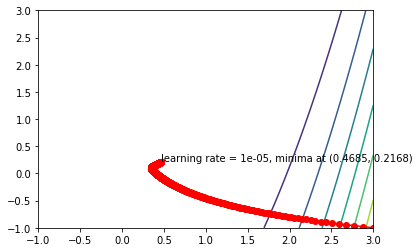

In [182]:
x = np.array([3,-1])
learning_rate = 0.00001
iteration = 20000
history = grad_descent(x,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

#### Learning rate: 0.0001

Text(0.8392, 0.7035, 'learning rate = 0.0001, minima at (0.8392, 0.7035)')

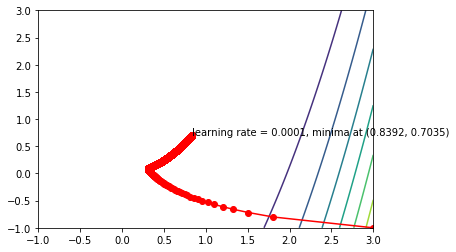

In [183]:
x = np.array([3,-1])
learning_rate = 0.0001
iteration = 20000
history = grad_descent(x,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

#### Learning rate: 0.0003

Text(0.9699, 0.9405, 'learning rate = 0.0003, minima at (0.9699, 0.9405)')

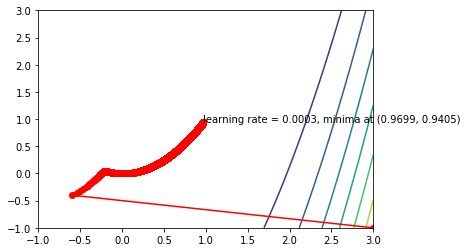

In [184]:
x = np.array([3,-1])
learning_rate = 0.0003
history = grad_descent(x,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

#### Learning rate: 0.0005
The result here is very close to the real minimum.

Text(0.9951, 0.9901, 'learning rate = 0.0005, minima at (0.9951, 0.9901)')

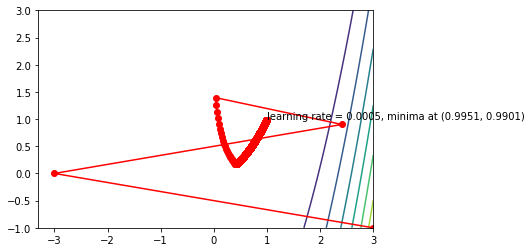

In [185]:
x = np.array([3,-1])
learning_rate = 0.0005
iteration = 20000
history = grad_descent(x,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

### 2.4
Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [186]:
def grad_descent_with_momentum(X, alpha, learning_rate, iteration):
    z = f(X)
    count = 0
    history = [X]
    v = np.zeros(X.size)
    while count < iteration:
        v = alpha*v + learning_rate*grad_f(X)
        new_X = X - v
        new_z = f(new_X)
        X = new_X
        z = new_z
        history.append(new_X)
        count+=1
    return history

Text(1.0022, 1.0045, 'learning rate = 0.0005,alpha = 0.3, minima at (1.0022, 1.0045)')

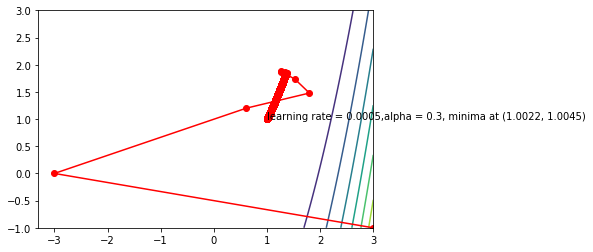

In [187]:
x = np.array([3,-1])
learning_rate = 0.0005
iteration = 20000
alpha = 0.3
history = grad_descent_with_momentum(x,alpha,learning_rate,iteration)

fig, ax = plt.subplots()
n = 500
x = np.linspace(-1,3,n)
y = np.linspace(-1,3,n)
X,Y = np.meshgrid(x,y)

Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in history]
y = [X[1] for X in history]
plt.plot(x,y,'-o', color='red')

x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) +",alpha = "+str(alpha) +", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )

## Backprop

### 3.1 
For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$$ Loss = -y_ilog(\hat{y})-(1-y_i)log(1-\hat{y})$$
$$ output = Sigmoid(y)$$
$$ y = v_1*out_1 + v_2*out_2 + v_3*out_3 + b$$
$$ out_j = ReLU(in_j) , 1<=j<=3 $$
$$ in_j = w_{1j}*x_1 + w_{2j}*x_2 +b_j , 1<=j<=3 $$

$ \frac{\partial Loss}{\partial v_i} = \frac{\partial Loss}{\partial output}\frac{\partial output}{\partial y} \frac{\partial y}{\partial v_i} = -(\frac{output}{\hat{output}}-\frac{1-output}{1-\hat{output}})* sigmoid(y)(1-sigmoid(y))* out_i $

$ \frac{\partial Loss}{\partial b} =\frac{\partial Loss}{\partial output}\frac{\partial output}{\partial y}\frac{\partial y}{\partial b} =-(\frac{output}{\hat{output}}-\frac{1-output}{1-\hat{output}})* sigmoid(y)(1-sigmoid(y))  $

$ \frac{\partial Loss}{\partial b_i} =\frac{\partial Loss}{\partial output}\frac{\partial output}{\partial y}\frac{\partial y}{\partial out_j}\frac{\partial out_j}{\partial in_j}\frac{\partial in_j}{\partial b_i} = -(\frac{output}{\hat{output}}-\frac{1-output}{1-\hat{output}})* sigmoid(y)(1-sigmoid(y))* v_j* w_i (if in_j>0)$

$ \frac{\partial Loss}{\partial b_i} = 0 (if in_j<0)$

$ \frac{\partial Loss}{\partial w_{ij}} =\frac{\partial Loss}{\partial output}\frac{\partial output}{\partial y}\frac{\partial y}{\partial out_j}\frac{\partial out_j}{\partial in_j}\frac{\partial in_j}{\partial w_{ij}} = -(\frac{output}{\hat{output}}-\frac{1-output}{1-\hat{output}})* sigmoid(y)(1-sigmoid(y))* v_j *x_i (if in_j>0)$

$\frac{\partial Loss}{\partial w_{ij}} = 0 (if in_j<0) $


### 3.2
Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

dw = [dw11,dw12,dw13,dw21,dw22,dw23]

dv = [dv1,dv2,dv3]

db = [db1,db2,db3]

dc

In [188]:
def loss(y,yhat):
    tot = -y * np.log(yhat) - (1-y)*np.log(1-yhat)
    return  tot.sum()

def d_loss(y,yhat):
    return -(y/yhat - (1-y)/(1-yhat))

def d_relu(x):
    return np.where(x>0, 1, 0)

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def ff_forward(X,W,b,V,c):
    hin = X.dot(W)+b
    hout = ReLU(hin)
    
    yhat = hout.dot(V)+c
    output = sigmoid(yhat)
    
    return [hin,hout,yhat,output]
def grad_f(X,W,b,V,c,gt):
    hin,hout,yhat,output = ff_forward(X,W,b,V,c)
    
    dc = d_loss(gt,output)*d_sigmoid(yhat)
    dv = d_loss(gt,output)*d_sigmoid(yhat) * hout.T
    db = d_loss(gt,output)*d_sigmoid(yhat) * V.T * (hin > 0)
    dw = X.T.dot( d_loss(gt,output)*d_sigmoid(yhat) * V.T * (hin > 0))
    
    return [dw,db,dv,dc]

### 3.3
Generate a synthetic dataset like the XOR pattern (see below).

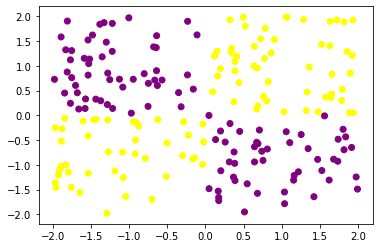

In [189]:
n= 200
x = np.random.uniform(-2,2,2*n).reshape(n,2)

col =['yellow']*n
for i in range(0,n):
    if x[i][0]*x[i][1]<0:
        col[i] = 'purple'

plt.scatter(x[:,0],x[:,1],color=col )

### 3.4 
Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [190]:
y = np.zeros(n)
for i in range(0,n):
    if col[i]=='yellow':
        y[i]=1
        
W = np.random.randn(6*n).reshape((n,2,3))
b = np.random.randn(3*n).reshape((n,1,3))
V = np.random.randn(3*n).reshape((n,3,1))
c= np.random.randn(1*n)
x = x.reshape((n,1,2))
y = y.reshape((n,1))

In [191]:
def grad_descent(x, y, W, b, V, c, iterations, learning_rate):
    losses = []
    
    for i in range(iterations):
        total_loss = 0
        
        for j in range(len(y)):
            hin,hout,yhat,output = ff_forward(x[j],W[j],b[j],V[j],c[j])
            dw,db,dv,dc = grad_f(x[j],W[j],b[j],V[j],c[j],y[j])
            W[j] = W[j] - learning_rate*dw
            b[j] = b[j] - learning_rate*db
            V[j] = V[j] - learning_rate*dv
            c[j] = c[j] - learning_rate*dc
            loss_j = loss(y[j],output)
            total_loss+=loss_j
        
        #print("loss for iter {}".format(i) + " {}".format(total_loss))
        
        losses.append(total_loss)
    return losses

In [192]:
iterations = 1000
learning_rate = 0.01
losses = grad_descent(x, y, W, b, V, c,iterations,learning_rate)

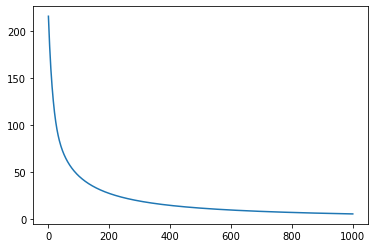

In [193]:
plt.plot(np.arange(1,iterations+1),losses)

### 3.5
Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.


In [194]:
W = np.random.randn(6*n).reshape((n,2,3))
b = np.random.randn(3*n).reshape((n,1,3))
V = np.random.randn(3*n).reshape((n,3,1))
c= np.random.randn(1*n)


def grad_descent_with_momentum(x, y, W, b, V, c, iterations, learning_rate,alpha):
    losses = []
    vw = np.zeros(6*n).reshape((n,2,3))
    vb = np.zeros(3*n).reshape((n,1,3))
    vv = np.zeros(3*n).reshape((n,3,1))
    vc= np.zeros(1*n)
    yhats = []
    for i in range(iterations):
        total_loss = 0
        for j in range(len(y)):
            hin,hout,yhat,output = ff_forward(x[j],W[j],b[j],V[j],c[j])
            dw,db,dv,dc = grad_f(x[j],W[j],b[j],V[j],c[j],y[j])
            vw[j] = alpha * vw[j] - learning_rate*dw
            vb[j] = alpha * vb[j] - learning_rate*db
            vv[j] = alpha * vv[j] - learning_rate*dv
            vc[j] = alpha * vc[j] - learning_rate*dc
            
            W[j] = W[j] + vw[j]
            b[j] = b[j] + vb[j]
            V[j] = V[j] + vv[j]
            c[j] = c[j] + vc[j]

            loss_j = loss(y[j],output)
            total_loss+=loss_j
            if i == iterations-1:
                yhats.append(output)
            
        
        #print("loss for iter{}".format(i) + " {}".format(total_loss))
        
        losses.append(total_loss)
    return [yhats,losses]

In [195]:
iterations = 1000
learning_rate = 0.01
alpha = 0.5
yhats,losses_with_momentum = grad_descent_with_momentum(x, y, W, b, V, c,iterations,learning_rate,alpha)

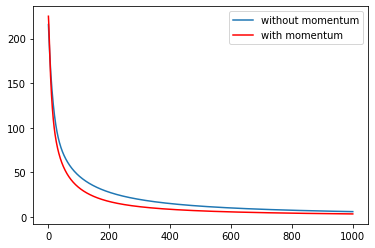

In [196]:
plt.plot(np.arange(1,iterations+1),losses,label='without momentum')
plt.plot(np.arange(1,iterations+1),losses_with_momentum,label='with momentum',color = 'red')
plt.legend()

### 3.6
Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

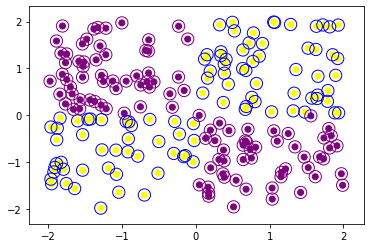

In [197]:
#credit to : https://github.com/daniuniuniuniu
#tried to use contourf to draw the decision boundary, but failed to get a reasonable result, because when I use ff_forward
#to do the prediction, I cannot get the correct parameters for the model, maybe because in my method, in 1 epoch,
#I have 200 points, therefore there are 200 parameter set, they get together get a good result, but not a single set
#is good to draw the contourf, and the same as their mean. 

#In her method, she draws the circle to represent area of certain prediction. Thus we can see the boundary of different
#types of predictions. It is not perfect, but makes sense, so I learned from her.

x1 = x.reshape([n,2])
yclass2=['blue']*n
for i in range(0,n):
    if yhats[i]<0.5:
        yclass2[i]= 'purple'
plt.scatter(x1[:,0],x1[:,1],color=col)
plt.scatter(x1[:,0],x1[:,1], color='', marker='o', edgecolors=yclass2, s=150)
plt.show()